# Evaluation Classification avec KNN/Logistic Train/Train

# Chargement du dataset

In [2]:
import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


#Charger les données du dataset iris
iris = datasets.load_iris()


# Shape des données

* Observation: 150
* Predicteurs: 4
* Reponse: Espece d'iris
* Type: classification puisque la reponse est categorie

In [4]:
#data represente les prédicteurs et target la cible à prédire
print(iris.data.shape)
print(iris.target.shape)
print iris

(150L, 4L)
(150L,)
{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4]

# Selection de feature-prédicteur

In [5]:
#On prend en compte tous les predicteurs
X = iris.data  
#On considere aussi la classe à prédire/determiner                       
y = iris.target


# Développer le modèle k-nearest neighbor

* Choisir une valeur pour k
* Trouver les voisins k dans l'ensemble d'apprentissage qui soit le plus proche de l'instance inconnue
* Prendre une distance euclidienne comme la mesure de distance entre les instances
* Une fois que les k voisins soient trouvés, prendre la classe la plus populaire

In [22]:
# Créer l'objet Neighbours Classifier  
#On considere KNN avec ponderation uniforme
weights = 'uniform'
k_neighbors = 15
clf = neighbors.KNeighborsClassifier(k_neighbors, weights=weights)


# Procéder à l'apprentissage du modèle

In [7]:
# Faire apprendre le model en utilisant les training set
clf.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

# Prédiction avec le modèle obtenu

In [9]:
# Faire une prédiction de classe pour toutes les observations dans X
y_knn = clf.predict(X)
print y_knn.shape
# Comparer les labels de classe predicts avec les vrais labels de classe
from sklearn import metrics
accuracy_knn=metrics.accuracy_score(y,y_knn)
print ("Accuracy du modele prédit: "+ str(accuracy_knn))

#essayer avec k =1 !!!

(150L,)
Accuracy du modele prédit: 0.986666666667


# utiliser logistic regression pour comparaison

In [12]:
from sklearn.linear_model import LogisticRegression
clf_logr = LogisticRegression()
clf_logr.fit(X,y)
#Utilisation pour prediction d'un echantillon
ech = [[3,5,4,2],[5,4,3,2]]
y_logR = clf_logr.predict(X)
accuracy_logR=metrics.accuracy_score(y,y_logR)
print ("Accuracy du modele prédit: "+ str(accuracy_logR))

Accuracy du modele prédit: 0.96


# Evaluation Classification avec KNN/Logistic Train/Test

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size=0.2, random_state=4)

In [27]:
#knn
clf.fit(X_train, y_train)
y_knn = clf.predict(X_test)
accuracy_knn=metrics.accuracy_score(y_test,y_knn)
print ("Accuracy du modele KNN prédit: "+ str(accuracy_knn))
#logR
clf_logr.fit(X_train, y_train)
y_logr = clf_logr.predict(X_test)
accuracy_logr=metrics.accuracy_score(y_test,y_logr)
print ("Accuracy du modele logR prédit: "+ str(accuracy_logr))

Accuracy du modele KNN prédit: 0.966666666667
Accuracy du modele logR prédit: 0.933333333333


# Graphe de testing accuracy contre valeur de K

* Déterminer accuracy pour k variable

In [ ]:
#  K=1 a K=30 et calcul testing accuracy pour knn
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

* Afficher le graphe accuracy vs K

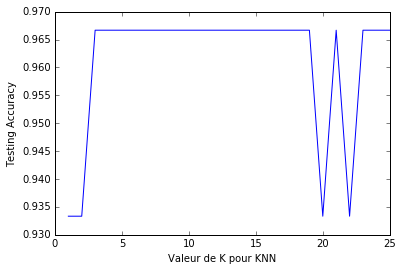

In [25]:
#Tracer le graphe
    
import matplotlib.pyplot as plt

%matplotlib inline

# plot de   K vs testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Valeur de K pour KNN')
plt.ylabel('Testing Accuracy')